In [3]:
import pandas as pd

ames_housing = pd.read_csv("..datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars","GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

### Ridge regressor

We us the default alpha value (1.0) to regularize the model. We se a 10-fold cross-validation and pass the argument return_estimator=True in sklearn.model_selection.cross_validate to access all fitted estimators fitted on each fold.A StandardScaler scales the data before passing it to the regressor.

In [27]:
from sklearn import set_config
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
cv_results = cross_validate(model, data_numerical, target, cv=10, 
                            return_estimator=True,n_jobs=2)


#### Acuracy score 

In [28]:
cv_results['test_score'].mean()

0.7190217317006746

#### Retrieving and plotting the `coef_`

In [29]:
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1014.941352,493.591270,6145.027307,7862.001820,-658.039034,2228.213769,10673.168368,7710.687901,11239.374795,-2770.569902,...,2145.052452,11610.344076,-3183.723296,3287.994032,1493.838234,-3391.962390,32.95300,740.771764,-2419.756875,-1050.602603
max,2813.950135,2601.096893,7822.622938,11098.319437,358.820285,4175.634363,15693.414764,11243.005735,13642.435186,-1280.035931,...,3758.486675,22562.769198,4626.005696,5791.918839,3030.459490,-2102.823437,1697.85694,2172.624444,71.092558,607.322413


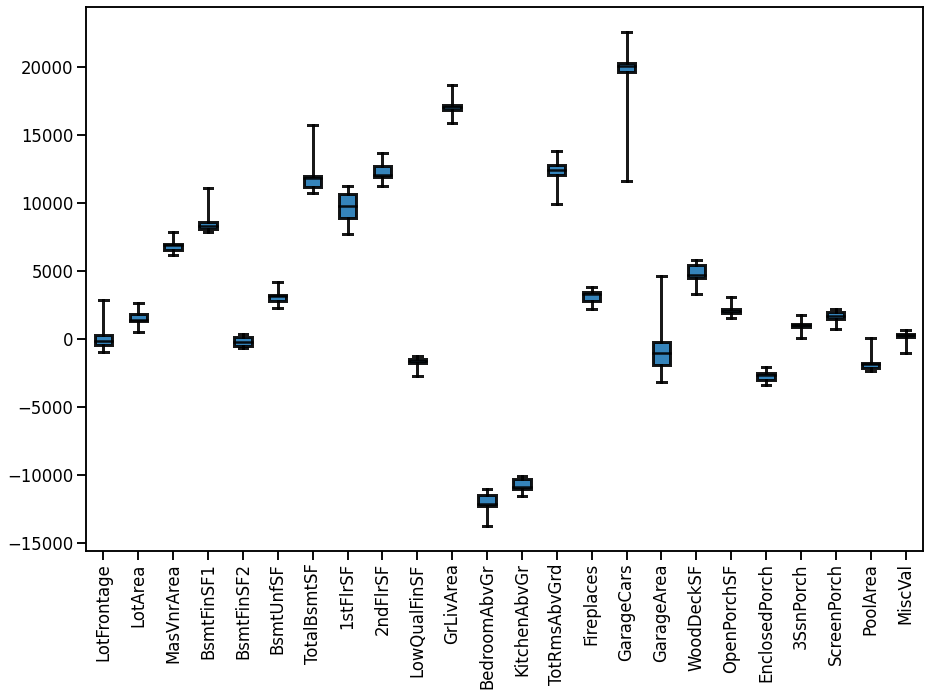

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

### RidgeCV regressor

In [43]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas=np.logspace(-3, 3, num=101)
model2= make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results2 = cross_validate(
    model2, data_numerical, target, cv=10, return_estimator=True)


#### Acuracy score 

In [44]:
cv_results2['test_score'].mean()


0.7159677536903799

#### Retrieving and plotting the `coef_`

In [45]:
coefs2 = [pipeline[-1].coef_ for pipeline in cv_results2["estimator"]]
coefs2 = pd.DataFrame(coefs2, columns=numerical_features)
coefs2.describe().loc[["min", "max"]]


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,38.652975,961.655936,6571.845907,6632.882723,-805.837310,2311.619975,9736.354859,7785.715524,8792.457560,-2105.446827,...,2937.176095,10855.560362,5900.709201,3510.073840,2444.831089,-3036.677405,104.433846,696.187449,-1509.761124,-1118.171765
max,2661.326993,2592.928650,7997.312361,10587.052511,-28.397411,3924.596537,14852.170471,8948.702031,12714.666357,-930.691632,...,5879.781189,13296.750348,7325.405214,5795.363926,3911.702621,-2096.896697,1559.553617,1986.348086,14.997116,554.961799


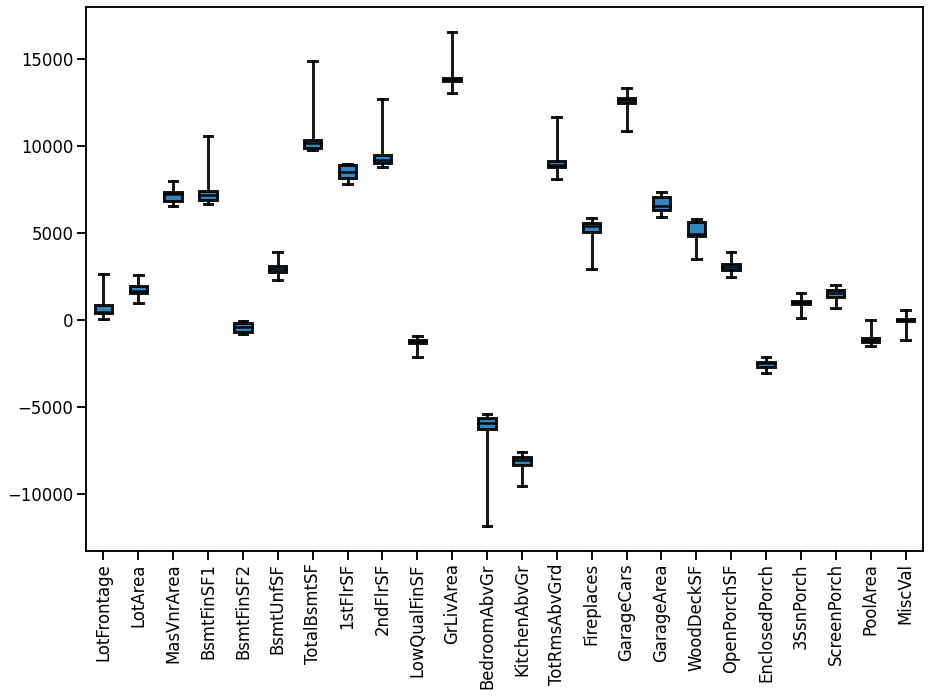

In [46]:
sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs2.plot.box(**boxplot_property, ax=ax)